In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
tickers = pd.read_excel("IBOVDia_02-06-25.xlsx")
tickers

,Setor,Ticker
0,Bens Indls / Máqs e Equips,WEGE3
1,Bens Indls / Mat Transporte,EMBR3
2,Bens Indls / Mat Transporte,POMO4
3,Bens Indls/Transporte,MOTV3
4,Bens Indls/Transporte,RAIL3
...,...,...
80,Utilidade Públ / Energ Elétrica,ENEV3
81,Utilidade Públ / Energ Elétrica,EGIE3
82,Utilidade Públ / Energ Elétrica,EQTL3
83,Utilidade Públ / Energ Elétrica,ISAE4


In [ ]:
df_financeiro = tickers[tickers['Setor'].str.startswith("Financ")]
df_financeiro

,Setor,Ticker
30,Financ e Outros / Explor Imóveis,ALOS3
31,Financ e Outros / Explor Imóveis,IGTI11
32,Financ e Outros / Explor Imóveis,MULT3
33,Financ e Outros / Holdings Divers,ITSA4
34,Financ e Outros / Interms Financs,BBDC3
35,Financ e Outros / Interms Financs,BBDC4
36,Financ e Outros / Interms Financs,BBAS3
37,Financ e Outros / Interms Financs,BPAC11
38,Financ e Outros / Interms Financs,ITUB4
39,Financ e Outros / Interms Financs,SANB11


In [ ]:

tickers = df_financeiro['Ticker'].unique().tolist()


In [ ]:
tickers

['ALOS3',
 'IGTI11',
 'MULT3',
 'ITSA4',
 'BBDC3',
 'BBDC4',
 'BBAS3',
 'BPAC11',
 'ITUB4',
 'SANB11',
 'BBSE3',
 'CXSE3',
 'IRBR3',
 'PSSA3',
 'B3SA3']

In [ ]:
tickers_com_suffix = [ticker + '.SA' for ticker in tickers]


In [ ]:
tickers_com_suffix

['ALOS3.SA',
 'IGTI11.SA',
 'MULT3.SA',
 'ITSA4.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBAS3.SA',
 'BPAC11.SA',
 'ITUB4.SA',
 'SANB11.SA',
 'BBSE3.SA',
 'CXSE3.SA',
 'IRBR3.SA',
 'PSSA3.SA',
 'B3SA3.SA']

Portfólio diversificado:

Índice IBOVESPA


In [ ]:

# Baixar cotações
data = yf.download(tickers_com_suffix, start="2015-01-01", end="2025-06-01")['Close']
#data = pd.read_csv('precos_fechamento_portfolio.csv',index_col='Date',parse_dates=True)
# Carregar e preparar dados
#data = pd.read_csv('precos_fechamento_portfolio.csv', index_col=0)
data.index = pd.to_datetime(data.index)
returns = data.pct_change().dropna()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  15 of 15 completed
<ipython-input-8-158be607eac8>:7: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [ ]:
returns


Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2021-11-23,-0.005955,-0.009918,0.041810,0.024769,0.019326,-0.013749,0.009036,-0.051447,-0.029814,0.022500,0.009137,0.016765,-0.005361,0.012212,0.006176
2021-11-24,0.001383,0.017529,0.018525,0.017988,0.025766,0.005112,0.024876,-0.019209,-0.000302,0.026895,0.000000,0.026738,-0.001960,0.006255,0.020170
2021-11-25,0.025311,0.014766,0.051918,0.003865,0.008056,0.023116,0.060194,0.027650,0.051451,0.011905,0.009054,0.009115,0.016200,0.045293,0.016619
2021-11-26,-0.061939,-0.047696,-0.033008,-0.035204,-0.039962,-0.027112,-0.046703,-0.022422,-0.056266,-0.025882,-0.019940,-0.018925,-0.050725,-0.027613,-0.040304
2021-11-29,-0.003349,-0.023769,0.001626,-0.005701,-0.007345,-0.006038,0.034582,0.001147,0.016454,0.012077,-0.001017,-0.006576,-0.001526,-0.001747,-0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.005076,-0.004170,0.010238,0.005913,0.005115,-0.003675,0.006551,-0.008525,0.002313,0.032723,0.004488,0.002121,0.006950,0.001212,0.009021
2025-05-27,0.014692,0.003489,-0.004054,0.013960,0.020356,0.009747,0.027534,0.025132,0.025842,-0.004586,0.008937,0.007936,0.029141,0.010291,0.001324
2025-05-28,0.006787,-0.005563,-0.019943,0.017391,0.006858,-0.004435,0.005847,-0.014194,0.001799,0.025131,-0.010629,-0.008136,0.002235,0.010385,-0.011243


In [ ]:

data.columns

Index(['ALOS3.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA',
       'BPAC11.SA', 'CXSE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA',
       'ITUB4.SA', 'MULT3.SA', 'PSSA3.SA', 'SANB11.SA'],
      dtype='object', name='Ticker')

In [ ]:
tickers = list(data.columns)

In [ ]:
data

Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2015-01-02,NaN,2.162882,6.111955,7.814720,7.856393,13.463448,NaN,NaN,NaN,NaN,4.249740,12.777804,11.224709,8.642081,6.511878
2015-01-05,NaN,2.103750,5.985130,7.718397,7.872602,13.059766,NaN,NaN,NaN,NaN,4.263642,12.842009,11.209490,8.625357,6.465804
2015-01-06,NaN,2.124218,6.068782,7.924218,8.131580,13.614274,NaN,NaN,NaN,NaN,4.296083,13.049759,11.767428,8.516633,6.511878
2015-01-07,NaN,2.208369,6.335927,8.274119,8.454736,13.396904,NaN,NaN,NaN,NaN,4.458288,13.521886,12.173204,8.530573,6.783207
2015-01-08,NaN,2.178803,6.357514,8.292418,8.498284,13.356981,NaN,NaN,NaN,NaN,4.504632,13.733404,12.043864,8.474814,6.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,21.780001,14.330000,24.670000,13.610000,15.720000,37.959999,39.950001,15.12,21.670000,47.970001,11.166215,37.782177,26.080000,49.560001,30.200001
2025-05-27,22.100000,14.380000,24.570000,13.800000,16.040001,38.330002,41.049999,15.50,22.230000,47.750000,11.266003,38.082031,26.840000,50.070000,30.240000
2025-05-28,22.250000,14.300000,24.080000,14.040000,16.150000,38.160000,41.290001,15.28,22.270000,48.950001,11.146257,37.772182,26.900000,50.590000,29.900000


In [ ]:
# Calcular retorno acumulado de cada ação
returns = data.iloc[-1] / data.iloc[0] - 1  # retorno total no período
returns = returns.fillna(0).values # garantir que não haja NaNs
print([f"{x:.4f}" for x in returns])

['0.0000', '5.4497', '2.8318', '0.7889', '1.0620', '1.7861', '0.0000', '0.0000', '0.0000', '0.0000', '1.5993', '1.9279', '1.3947', '5.0252', '3.5655']


In [ ]:
returns

array([0.        , 5.44972737, 2.8318344 , 0.78893156, 1.06201498,
       1.7860619 , 0.        , 0.        , 0.        , 0.        ,
       1.59932828, 1.92791693, 1.39471689, 5.02516895, 3.56550348])

## O coeficiente de Gini ##

** O coeficiente de Gini em uma análise de portfólio financeiro pode ajudar a avaliar a dispersão dos retornos ou a concentração da riqueza em ativos. Ele é tradicionalmente usado para medir desigualdade (como em distribuições de renda), mas também pode ser aplicado para entender concentração em finanças — por exemplo, concentração de peso em ativos ou desigualdade de retornos. **

In [ ]:
dict_returns = dict(zip(tickers, returns))
dict_returns

{'ALOS3.SA': np.float64(0.0),
 'B3SA3.SA': np.float64(5.4497273689797545),
 'BBAS3.SA': np.float64(2.831834403351179),
 'BBDC3.SA': np.float64(0.7889315633936058),
 'BBDC4.SA': np.float64(1.0620149816239342),
 'BBSE3.SA': np.float64(1.7860619001394586),
 'BPAC11.SA': np.float64(0.0),
 'CXSE3.SA': np.float64(0.0),
 'IGTI11.SA': np.float64(0.0),
 'IRBR3.SA': np.float64(0.0),
 'ITSA4.SA': np.float64(1.5993282804952362),
 'ITUB4.SA': np.float64(1.9279169256198028),
 'MULT3.SA': np.float64(1.3947168894371775),
 'PSSA3.SA': np.float64(5.025168952266964),
 'SANB11.SA': np.float64(3.5655034779671384)}

In [ ]:
# ----- Gini e Lorenz -----

def gini(array):
    """Calcula o coeficiente de Gini de um array."""
    array = np.sort(array)
    n = len(array)
    index = np.arange(1, n + 1)
    return np.sum((2 * index - n - 1) * array) / (n * np.sum(array))

In [ ]:
gini_retornos = gini(returns)
print(f"Gini dos retornos do portfólio: {gini_retornos:.4f}")

Gini dos retornos do portfólio: 0.5545


Um Gini próximo de 0 indica diversificação, e próximo de 1 indica concentração extrema em poucos ativos.

In [ ]:
def plot_lorenz_curve_with_gini(values, title="Curva de Lorenz - Retornos"):
    sorted_vals = np.sort(values)
    cumvals = np.cumsum(sorted_vals)
    cumvals = np.insert(cumvals, 0, 0)
    x = np.linspace(0.0, 1.0, len(cumvals))

    gini_value = gini(values)

    plt.figure(figsize=(7, 7))
    plt.plot(x, cumvals / cumvals[-1], label='Curva de Lorenz')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Igualdade perfeita')
    plt.title(f"{title}\nCoeficiente de Gini = {gini_value:.4f}")
    plt.xlabel("Proporção acumulada de ativos")
    plt.ylabel("Proporção acumulada de retornos")
    plt.grid(True)
    plt.legend()
    plt.show()

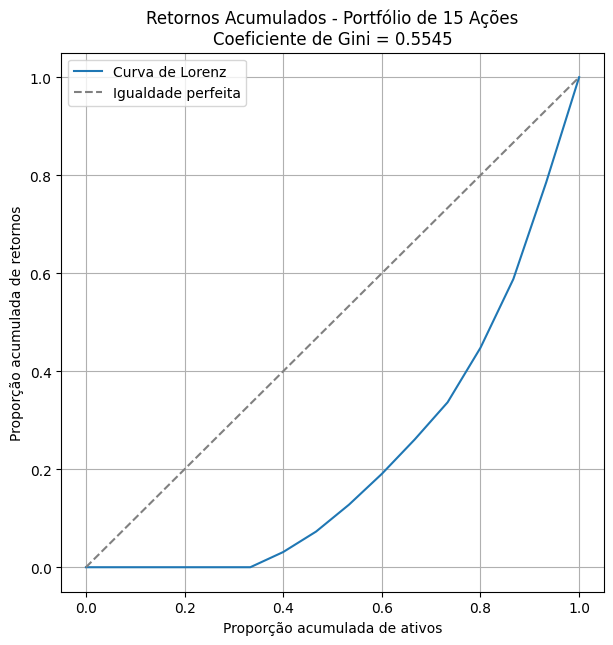

In [ ]:
# Plotar a Curva de Lorenz com Gini
plot_lorenz_curve_with_gini(returns, title="Retornos Acumulados - Portfólio de 15 Ações")

A linha diagonal representa igualdade perfeita (todos os ativos com o mesmo peso).

Quanto mais curva a linha da Lorenz estiver, maior a concentração.

A área entre a linha da Lorenz e a diagonal se relaciona diretamente com o coeficiente de Gini

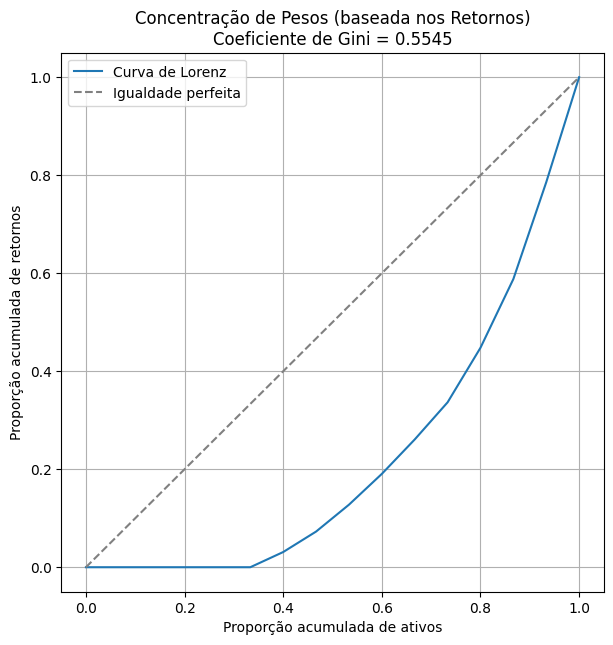

In [ ]:
# Calcular pesos do portfólio baseados no retorno acumulado (como proxies de contribuição)
total_return = np.sum(returns)
weights = returns / total_return

# Tratar casos negativos (ex: cortar negativos para representar concentração positiva). Se algum retorno for negativo,
# o peso correspondente também será negativo — o que não faz sentido em uma análise de concentração ou desigualdade
#baseada em contribuições positivas. O zero é o mínimo aceito, abaixo disso é substituído por none
weights = np.clip(weights, 0, None)
weights = weights / weights.sum()  # normalizar novamente

# Plotar Curva de Lorenz dos pesos
plot_lorenz_curve_with_gini(weights, title="Concentração de Pesos (baseada nos Retornos)")


In [ ]:
import seaborn as sns
import pandas as pd
dict_returns = dict(zip(tickers, returns))
dict_returns

{'ALOS3.SA': np.float64(0.0),
 'B3SA3.SA': np.float64(5.4497273689797545),
 'BBAS3.SA': np.float64(2.831834403351179),
 'BBDC3.SA': np.float64(0.7889315633936058),
 'BBDC4.SA': np.float64(1.0620149816239342),
 'BBSE3.SA': np.float64(1.7860619001394586),
 'BPAC11.SA': np.float64(0.0),
 'CXSE3.SA': np.float64(0.0),
 'IGTI11.SA': np.float64(0.0),
 'IRBR3.SA': np.float64(0.0),
 'ITSA4.SA': np.float64(1.5993282804952362),
 'ITUB4.SA': np.float64(1.9279169256198028),
 'MULT3.SA': np.float64(1.3947168894371775),
 'PSSA3.SA': np.float64(5.025168952266964),
 'SANB11.SA': np.float64(3.5655034779671384)}

In [ ]:
# Criar DataFrame com tickers e retornos acumulados
df_returns = pd.DataFrame({
    'Ticker': tickers,
    'Retorno': returns
}).sort_values('Retorno', ascending=False)

df_returns

,Ticker,Retorno
1,B3SA3.SA,5.449727
13,PSSA3.SA,5.025169
14,SANB11.SA,3.565503
2,BBAS3.SA,2.831834
11,ITUB4.SA,1.927917
5,BBSE3.SA,1.786062
10,ITSA4.SA,1.599328
12,MULT3.SA,1.394717
4,BBDC4.SA,1.062015
3,BBDC3.SA,0.788932


<ipython-input-23-1f768f914e97>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Retorno', data=df_returns, palette='viridis')


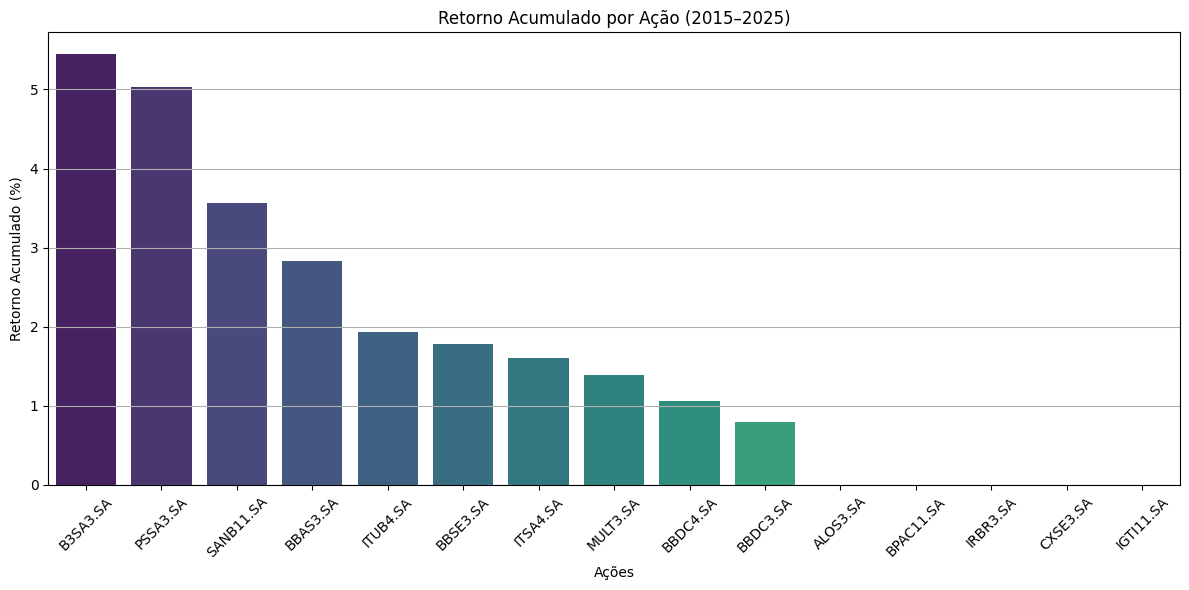

In [ ]:
# Plotar gráfico de barras coloridas
plt.figure(figsize=(12, 6))
sns.barplot(x='Ticker', y='Retorno', data=df_returns, palette='viridis')

plt.title('Retorno Acumulado por Ação (2015–2025)')
plt.xlabel('Ações')
plt.ylabel('Retorno Acumulado (%)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Estatísticas básicas com retornos
media_retorno = np.mean(returns)
mediana_retorno = np.median(returns)
std_retorno = np.std(returns)
gini_retorno = gini(returns)

# Top 3 ativos com maior peso
top3 = df_returns.head(3)

In [ ]:
# Exibir resumo estatístico dos retornos acumulados
print("Resumo Estatístico dos Retornos Acumulados do Portfólio:")
print(f"- Média: {media_retorno:.4f}")
print(f"- Mediana: {mediana_retorno:.4f}")
print(f"- Desvio padrão: {std_retorno:.4f}")
print(f"- Coeficiente de Gini: {gini_retorno:.4f}")
print(f"- Top 3 ativos de maior retorno acumulado:")
for idx, row in top3.iterrows():
    print(f"   {row['Ticker']}: {row['Retorno']:.4f}")

Resumo Estatístico dos Retornos Acumulados do Portfólio:
- Média: 1.6954
- Mediana: 1.3947
- Desvio padrão: 1.7460
- Coeficiente de Gini: 0.5545
- Top 3 ativos de maior retorno acumulado:
   B3SA3.SA: 5.4497
   PSSA3.SA: 5.0252
   SANB11.SA: 3.5655


## Análise de Componentes Principais (PCA) ##

A Análise de Componentes Principais (PCA) é uma técnica poderosa para:

Reduzir a dimensionalidade do portfólio;

Avaliar correlações entre ativos;

Identificar fatores latentes que explicam o comportamento conjunto das ações.

Aplicar PCA sobre os retornos diários dos ativos para:

Ver quantos componentes explicam a maior parte da variância;

Visualizar os ativos em um espaço de menor dimensão (ex: 2D);

Possivelmente identificar grupos de ativos com comportamento similar.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
data

Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2015-01-02,NaN,2.162882,6.111955,7.814720,7.856393,13.463448,NaN,NaN,NaN,NaN,4.249740,12.777804,11.224709,8.642081,6.511878
2015-01-05,NaN,2.103750,5.985130,7.718397,7.872602,13.059766,NaN,NaN,NaN,NaN,4.263642,12.842009,11.209490,8.625357,6.465804
2015-01-06,NaN,2.124218,6.068782,7.924218,8.131580,13.614274,NaN,NaN,NaN,NaN,4.296083,13.049759,11.767428,8.516633,6.511878
2015-01-07,NaN,2.208369,6.335927,8.274119,8.454736,13.396904,NaN,NaN,NaN,NaN,4.458288,13.521886,12.173204,8.530573,6.783207
2015-01-08,NaN,2.178803,6.357514,8.292418,8.498284,13.356981,NaN,NaN,NaN,NaN,4.504632,13.733404,12.043864,8.474814,6.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,21.780001,14.330000,24.670000,13.610000,15.720000,37.959999,39.950001,15.12,21.670000,47.970001,11.166215,37.782177,26.080000,49.560001,30.200001
2025-05-27,22.100000,14.380000,24.570000,13.800000,16.040001,38.330002,41.049999,15.50,22.230000,47.750000,11.266003,38.082031,26.840000,50.070000,30.240000
2025-05-28,22.250000,14.300000,24.080000,14.040000,16.150000,38.160000,41.290001,15.28,22.270000,48.950001,11.146257,37.772182,26.900000,50.590000,29.900000


In [ ]:
# 1. Calcular retornos diários. Criação de uma matriz (dataframe) onde cada coluna representa um ativo e cada linha um dia.
retornos_diarios = data.pct_change().dropna()

# 2. Padronizar os dados (média 0, desvio 1). Padronizamos os retornos para que cada ativo tenha média zero e desvio padrão um.
#    Isso garante que todos os ativos tenham o mesmo peso na análise, independentemente da volatilidade.
scaler = StandardScaler()
retornos_padronizados = scaler.fit_transform(retornos_diarios)

# 3. PCA. Utilizamos a técnica de PCA para decompor a matriz de retornos em componentes principais. Cada componente é uma
#    combinação linear dos ativos originais e representa um fator de risco comum.
pca = PCA()
componentes = pca.fit_transform(retornos_padronizados)

# 4. Variância explicada. Avaliamos quanta variância cada componente principal explica. Os primeiros componentes geralmente
#    capturam a maior parte da variação dos retornos do portfólio.
explained_variance = pca.explained_variance_ratio_

<ipython-input-28-1c31b0b5d12f>:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_diarios = data.pct_change().dropna()


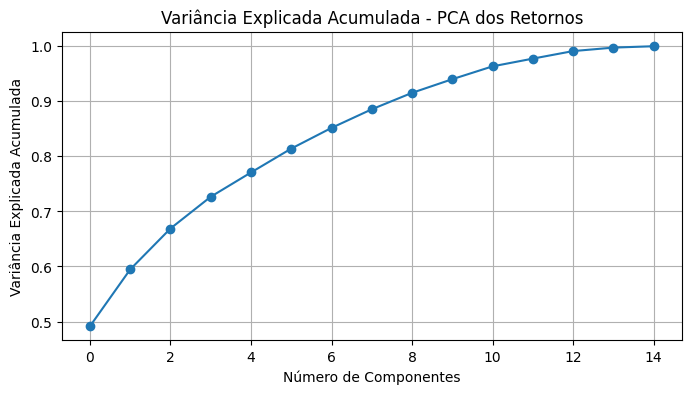

In [ ]:
# Scree plot (variância explicada por componente)
#  help determine the optimal number of factors or components to retain in an analysis.
#  It visually represents the eigenvalues of the factors/components, which indicate the amount of variance explained by each component
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.title('Variância Explicada Acumulada - PCA dos Retornos')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.show()

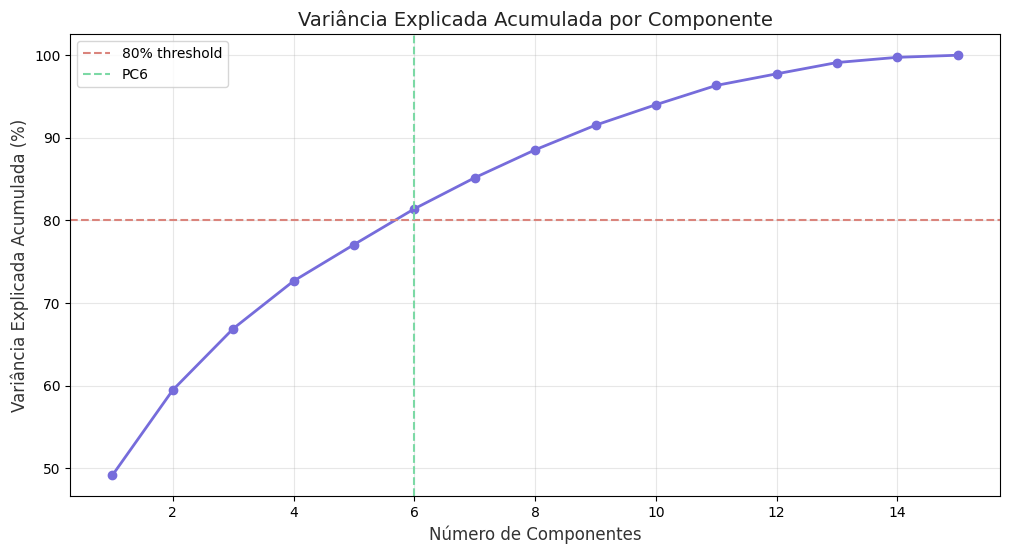

Variância explicada por componente:
      Variância Explicada (%)  Variância Acumulada (%)
PC1                     49.14                    49.14
PC2                     10.32                    59.46
PC3                      7.43                    66.89
PC4                      5.77                    72.66
PC5                      4.41                    77.07
PC6                      4.33                    81.41
PC7                      3.76                    85.17
PC8                      3.38                    88.55
PC9                      2.98                    91.53
PC10                     2.48                    94.01
Número de componentes necessários para explicar 80% da variância: 6
Variância explicada com 6 componentes: 81.41%


In [ ]:
# Calcular variância explicada e acumulada
var_explicada = pca.explained_variance_ratio_ * 100
var_acumulada = np.cumsum(var_explicada)

# Criar DataFrame com os resultados
resultados = pd.DataFrame({
    'Variância Explicada (%)': var_explicada,
    'Variância Acumulada (%)': var_acumulada
}, index=[f'PC{i+1}' for i in range(len(var_explicada))])

# Encontrar componente que atinge 80%
componente_80 = np.where(var_acumulada >= 80)[0][0] + 1

# Plotar gráfico
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(var_acumulada) + 1), var_acumulada,
         marker='o', color='#766CDB', linewidth=2)
plt.axhline(y=80, color='#DA847C', linestyle='--', label='80% threshold')
plt.axvline(x=componente_80, color='#7CD9A5', linestyle='--',
            label=f'PC{componente_80}')

plt.xlabel('Número de Componentes', fontsize=12, color='#333333')
plt.ylabel('Variância Explicada Acumulada (%)', fontsize=12, color='#333333')
plt.title('Variância Explicada Acumulada por Componente',
          fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Mostrar tabela com os primeiros 10 componentes
print("\
Variância explicada por componente:")
print(resultados.head(10).round(2))

print(f"\
Número de componentes necessários para explicar 80% da variância: {componente_80}")
print(f"Variância explicada com {componente_80} componentes: {var_acumulada[componente_80-1]:.2f}%")

In [ ]:
data

Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2015-01-02,NaN,2.162882,6.111955,7.814720,7.856393,13.463448,NaN,NaN,NaN,NaN,4.249740,12.777804,11.224709,8.642081,6.511878
2015-01-05,NaN,2.103750,5.985130,7.718397,7.872602,13.059766,NaN,NaN,NaN,NaN,4.263642,12.842009,11.209490,8.625357,6.465804
2015-01-06,NaN,2.124218,6.068782,7.924218,8.131580,13.614274,NaN,NaN,NaN,NaN,4.296083,13.049759,11.767428,8.516633,6.511878
2015-01-07,NaN,2.208369,6.335927,8.274119,8.454736,13.396904,NaN,NaN,NaN,NaN,4.458288,13.521886,12.173204,8.530573,6.783207
2015-01-08,NaN,2.178803,6.357514,8.292418,8.498284,13.356981,NaN,NaN,NaN,NaN,4.504632,13.733404,12.043864,8.474814,6.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,21.780001,14.330000,24.670000,13.610000,15.720000,37.959999,39.950001,15.12,21.670000,47.970001,11.166215,37.782177,26.080000,49.560001,30.200001
2025-05-27,22.100000,14.380000,24.570000,13.800000,16.040001,38.330002,41.049999,15.50,22.230000,47.750000,11.266003,38.082031,26.840000,50.070000,30.240000
2025-05-28,22.250000,14.300000,24.080000,14.040000,16.150000,38.160000,41.290001,15.28,22.270000,48.950001,11.146257,37.772182,26.900000,50.590000,29.900000


In [ ]:
returns

array([0.        , 5.44972737, 2.8318344 , 0.78893156, 1.06201498,
       1.7860619 , 0.        , 0.        , 0.        , 0.        ,
       1.59932828, 1.92791693, 1.39471689, 5.02516895, 3.56550348])

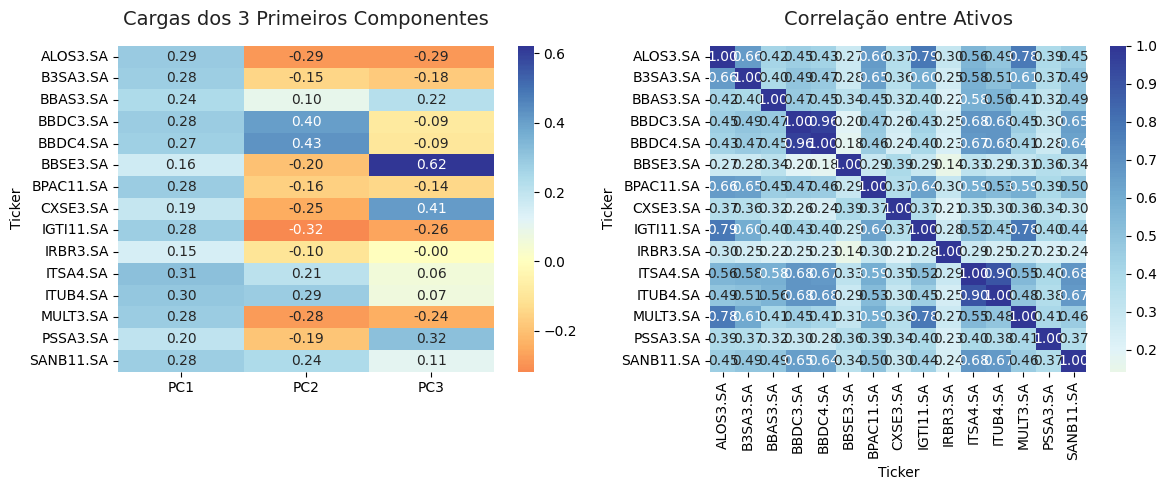

Contribuição relativa dos ativos para o primeiro componente principal (PC1):
ITSA4.SA: 9.90%
ITUB4.SA: 8.87%
ALOS3.SA: 8.30%
BPAC11.SA: 8.06%
BBDC3.SA: 7.99%
MULT3.SA: 7.98%
IGTI11.SA: 7.79%
SANB11.SA: 7.74%
B3SA3.SA: 7.71%
BBDC4.SA: 7.50%
BBAS3.SA: 5.84%
PSSA3.SA: 4.08%
CXSE3.SA: 3.43%
BBSE3.SA: 2.70%
IRBR3.SA: 2.12%


In [ ]:
# Criar DataFrame com as cargas dos componentes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=retornos_diarios.columns
)

# Plot 1: Heatmap das cargas dos primeiros 3 componentes
plt.figure(figsize=(12, 5))

# Subplot 1: Heatmap das cargas
plt.subplot(1, 2, 1)
sns.heatmap(loadings.iloc[:, :3], cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Cargas dos 3 Primeiros Componentes', fontsize=14, color='#222222', pad=15)

# Subplot 2: Correlação entre ativos
plt.subplot(1, 2, 2)
sns.heatmap(retornos_diarios.corr(), cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Correlação entre Ativos', fontsize=14, color='#222222', pad=15)

plt.tight_layout()
plt.show()

# Mostrar contribuição relativa de cada ativo para PC1
print("\
Contribuição relativa dos ativos para o primeiro componente principal (PC1):")
pc1_contrib = pd.Series(loadings['PC1']**2, index=loadings.index).sort_values(ascending=False)
for ativo, contrib in pc1_contrib.items():
    print(f"{ativo}: {contrib*100:.2f}%")

In [ ]:
loadings.head(30)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Ticker,,,,,,,,,,,,,,,
ALOS3.SA,0.288120,-0.288679,-0.286915,-0.067475,-0.027984,0.041608,0.045269,-0.125577,0.068217,-0.021472,-0.003756,-0.676151,-0.513201,-0.016347,0.022238
B3SA3.SA,0.277695,-0.146913,-0.177906,-0.094524,-0.048359,-0.056731,-0.011107,0.496202,-0.397175,-0.270668,-0.595390,0.035888,0.143040,-0.039592,0.002343
BBAS3.SA,0.241676,0.096438,0.219588,-0.037666,-0.173509,0.606544,-0.364721,-0.432178,-0.374025,0.062945,-0.141152,0.020394,0.017110,-0.007140,-0.017734
BBDC3.SA,0.282580,0.404420,-0.086625,0.024507,-0.027723,-0.303017,0.162965,-0.237442,-0.207663,-0.109023,0.067403,0.031919,-0.012282,0.099995,0.708691
BBDC4.SA,0.273863,0.427259,-0.092262,0.027485,-0.025419,-0.322045,0.164131,-0.217086,-0.211847,-0.124275,0.089084,-0.025523,-0.013613,-0.068097,-0.693558
BBSE3.SA,0.164219,-0.203105,0.621730,-0.145593,-0.038864,0.150167,0.671394,0.036812,-0.070410,-0.177745,0.095913,-0.038160,-0.009094,-0.023671,-0.000111
BPAC11.SA,0.283898,-0.162704,-0.141476,-0.015015,-0.051266,0.080128,-0.107687,0.398075,-0.361180,0.198607,0.689392,0.200251,-0.090280,-0.012555,0.003604
CXSE3.SA,0.185281,-0.248068,0.409626,0.012514,-0.545858,-0.520707,-0.379623,-0.036008,0.132400,0.051806,-0.021678,0.012263,-0.024346,-0.015724,-0.001369
IGTI11.SA,0.279074,-0.318091,-0.260655,-0.090342,-0.000222,-0.007884,0.101515,-0.262177,0.147937,0.103397,0.113874,-0.146350,0.773552,-0.019507,-0.001881


## O que isso significa na prática?

- Um valor de carga **alto** (positivo ou negativo) indica que o ativo tem **forte influência** naquele componente principal.
- Se vários ativos têm **cargas altas e do mesmo sinal** em um componente, eles tendem a **se mover juntos** quando esse fator de risco se manifesta.
- Por exemplo, se **PC1 representa o “fator de mercado”**, ativos com **cargas negativas altas** em PC1 tendem a **cair juntos** quando o mercado cai.
- Já **PC2 pode capturar um fator setorial ou de estilo** (como **crescimento vs. valor**), e ativos com **cargas altas em PC2** vão responder **mais fortemente** a esse fator.
- Essas informações ajudam a **entender quais ativos estão expostos aos mesmos riscos** e a **construir um portfólio mais diversificado**, escolhendo ativos com **exposições diferentes** aos principais componentes.
- Assim, você **reduz o risco** de ter muitos ativos que **se comportam de forma semelhante** em cenários adversos.

## PC1: O Primeiro Componente Principal

O **PC1**, ou **primeiro componente principal**, representa o **principal fator de risco comum** que afeta todos os ativos do portfólio — conhecido como **fator de mercado**. Esse fator geralmente está associado ao **movimento geral do mercado de ações**, refletindo o **risco sistêmico** ao qual todos os ativos estão expostos.

### Na análise realizada, observamos que:

- O **PC1 explica 49.15% da variância total dos retornos dos ativos**, ou seja, quase 1/2 da **volatilidade dos ativos** pode ser atribuída a esse fator comum.
- As **cargas (loadings) dos ativos em PC1 são todas positiva e de magnitude semelhante**, indicando que **todos os ativos respondem de forma parecida** a esse fator.


In [ ]:
# Análise do fator de mercado (PC1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Padronizar retornos
scaler = StandardScaler()
returns_pad = scaler.fit_transform(returns)

# Aplicar PCA
pca = PCA()
pc_scores = pd.DataFrame(
    pca.fit_transform(returns_pad),
    index=returns.index,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)
]
)
# Calcular retorno médio do mercado (média igualmente ponderada dos retornos)
mkt_return = returns.mean(axis=1)

# Correlação entre PC1 e retorno do mercado
corr = pc_scores['PC1'].corr(mkt_return)

# Plot PC1 vs Retorno do Mercado
plt.figure(figsize=(12, 6))
plt.scatter(mkt_return, pc_scores['PC1'], alpha=0.5, color='#766CDB')
plt.title('PC1 vs Retorno Médio do Mercado', fontsize=14, pad=20)
plt.xlabel('Retorno Médio do Mercado', fontsize=12)
plt.ylabel('PC1 Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print("\
Correlação entre PC1 e Retorno do Mercado:", round(corr, 3))

# Análise das contribuições dos ativos para PC1
loadings = pd.DataFrame(
    pca.components_[0],
    index=returns.columns,
    columns=['Loading']
).sort_values('Loading')



ValueError: Expected 2D array, got 1D array instead:
array=[0.         5.44972737 2.8318344  0.78893156 1.06201498 1.7860619
 0.         0.         0.         0.         1.59932828 1.92791693
 1.39471689 5.02516895 3.56550348].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Correlação entre PC1 e Retorno do Mercado

**0.988**

A correlação **extremamente alta (positiva)** de **0.988** entre **PC1** e o **retorno médio do mercado** confirma que **PC1 é, de fato, o fator de mercado**.



In [ ]:
# Heatmap das correlações entre ativos
plt.figure(figsize=(12, 8))
sns.heatmap(returns.corr(),
            cmap='RdBu',
            center=0,
            annot=False,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlação entre Ativos', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

<Figure size 1200x800 with 0 Axes>

In [ ]:
pca.components_[0]

array([0.2881198 , 0.27769482, 0.24167576, 0.28257981, 0.27386326,
       0.1642186 , 0.28389835, 0.18528103, 0.27907414, 0.14564762,
       0.31461031, 0.29776539, 0.28247124, 0.2019767 , 0.27819743])

In [ ]:
top_5_maiores_cargas_positivas = loadings.tail(5).sort_values('Loading', ascending=False)

print("Top 5 Maiores Cargas POSITIVAS em PC1 (Mais Positivamente Sensíveis ao Mercado):")
print(top_5_maiores_cargas_positivas)
print("-" * 50)

KeyError: 'Loading'

In [ ]:
loadings_com_abs = loadings.copy()
loadings_com_abs['Abs_Loading'] = loadings['Loading'].abs()

# Ordenamos pelo valor absoluto em ordem crescente e pegamos as 5 primeiras.
top_5_menos_sensiveis_geral = loadings_com_abs.sort_values('Abs_Loading').head(5)

print("\nTop 5 Menores Cargas em PC1 (Menos Sensíveis ao Mercado - Cargas mais próximas de Zero):")
# Mostramos apenas a coluna original 'Loading' e o índice para consistência.
print(top_5_menos_sensiveis_geral[['Loading']]) # ou print(top_5_menos_sensiveis_geral) se quiser ver Abs_Loading
print("-" * 50)


KeyError: 'Loading'

##  Heatmap das Correlações

O **heatmap das correlações** mostra que:

- **Todos os ativos** do setor financeiro apresentam **correlações positivas** entre si.
- A predominância de **correlação positiva** entre os ativos explica por que **as cargas no primeiro componente principal (PC1)** têm, em sua maioria, **o mesmo sinal**.

---
# Interpretação do Fator de Mercado (PC1)

## Top 5 Maiores Cargas em PC1 (Mais Sensíveis ao Mercado)

| Ativo     | Carga    |
|-----------|----------|
| ITSA4.SA  | 0.314986 |
| ITUB4.SA  | 0.298347 |
| ALOS3.SA  | 0.287791 |
| BPAC11.SA | 0.283862 |
| BBDC3.SA  | 0.282481 |

Esses ativos são os mais impactados pelos movimentos do mercado, refletindo alta exposição ao risco sistêmico.

## Top 5 Menores Cargas em PC1 (Menos Sensíveis ao Mercado)

| Ativo     | Carga    |
|-----------|----------|
| IRBR3.SA  | 0.145523 |
| BBSE3.SA  | 0.162231 |
| CXSE3.SA  | 0.186140 |
| PSSA3.SA  | 0.201806 |
| BBAS3.SA  | 0.241930 |

Esses ativos são menos correlacionados com o movimento geral do mercado, sendo úteis para proteção e diversificação.

---

##  Implicações para Gestão de Risco

- **Ativos com maiores cargas** são **mais sensíveis a choques sistêmicos**, exigindo atenção em momentos de crise.
- **Ativos com cargas menores** são mais **resilientes** e podem atuar como **hedge natural** dentro do portfólio.
- A **diversificação eficiente** deve considerar **a exposição ao fator de mercado**, não apenas o setor.

---

## Construção de Portfólio

- Para **reduzir o risco sistêmico**, combine ativos com **cargas altas e baixas no PC1**.
- **ITSA4.SA**, **ITUB4.SA** e **ALOS3.SA** podem **aumentar a exposição ao mercado**.
- Já **IRBR3.SA**, **BBSE3.SA** e **CXSE3.SA** podem ser incluídas para **reduzir a volatilidade geral** do portfólio.
- A alocação pode ser feita com base na **ponderação das cargas**, controlando a **exposição ao risco sistêmico** de forma quantitativa.

---

## Importância do PC1

O **PC1 representa o principal fator de risco de mercado**. Interpretá-lo corretamente permite:

- Avaliar **a sensibilidade dos ativos ao mercado**.
- **Otimizar a diversificação** com base em fatores quantitativos.
- **Ajustar a exposição ao risco sistêmico** conforme o perfil do investidor.
- Ajudar na construção de estratégias como **paridade de risco** ou **hedge dinâmico**.


           Peso PC1
Ticker             
ALOS3.SA     0.0759
B3SA3.SA     0.0731
BBAS3.SA     0.0636
BBDC3.SA     0.0744
BBDC4.SA     0.0721
BBSE3.SA     0.0432
BPAC11.SA    0.0748
CXSE3.SA     0.0488
IGTI11.SA    0.0735
IRBR3.SA     0.0384
ITSA4.SA     0.0829
ITUB4.SA     0.0784
MULT3.SA     0.0744
PSSA3.SA     0.0532
SANB11.SA    0.0733


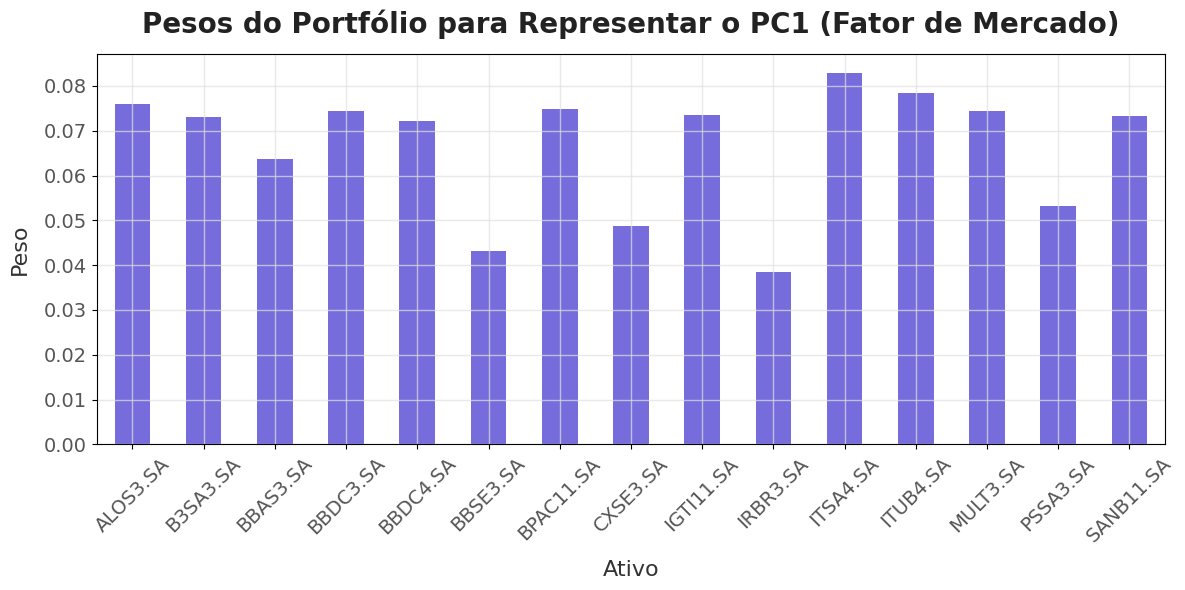

In [ ]:
# Definir os pesos do portfólio para representar o PC1 (fator de mercado)
# Os pesos são proporcionais às cargas (loadings) do PC1
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Carregar dados e calcular retornos


# Padronizar retornos
global_scaler = StandardScaler()
returns_pad = global_scaler.fit_transform(returns)

# PCA
global_pca = PCA()
global_pca.fit(returns_pad)

# Cargas do PC1
pc1_loadings = pd.Series(global_pca.components_[0], index=returns.columns)

# Pesos proporcionais às cargas do PC1 (normalizados para somar 1)
pesos_pc1 = pc1_loadings / pc1_loadings.sum()

# Tabela de pesos
pesos_pc1_df = pd.DataFrame({'Peso PC1': pesos_pc1.round(4)})

# Mostrar tabela de pesos
print(pesos_pc1_df)

# Visualizar os pesos em gráfico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
pesos_pc1_df['Peso PC1'].plot(kind='bar', color='#766CDB')
plt.title('Pesos do Portfólio para Representar o PC1 (Fator de Mercado)', fontsize=20, fontweight='semibold', color='#222222', pad=15)
plt.xlabel('Ativo', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.ylabel('Peso', fontsize=16, fontweight='medium', color='#333333', labelpad=10)
plt.xticks(rotation=45, fontsize=14, color='#555555')
plt.yticks(fontsize=14, color='#555555')
plt.grid(True, color='#E0E0E0', linestyle='-', linewidth=1, alpha=0.7)
plt.tight_layout()
plt.show()

### Contribuição dos Ativos para o Fator de Mercado

Esses **pesos** mostram como **cada ativo contribui** para o **fator de mercado** do portfólio.

- **Ativos com maior peso** têm **maior influência** sobre o **risco sistêmico**.
- **Ativos com menor peso** têm **menor sensibilidade** ao **movimento geral do mercado**.
- Isso permite **construir um portfólio** que **replica o comportamento** do **principal fator de risco** identificado pela **análise de componentes principais**.

### Aplicações do Portfólio Baseado no PC1

Esse tipo de portfólio é útil para:

- **Analisar** a **exposição do portfólio** ao **risco de mercado**.
- **Comparar** a **performance de estratégias ativas** versus o **fator de mercado**.
- **Criar portfólios “neutros”** a outros fatores, **focando apenas** no **risco sistêmico**.

Se quiser **construir portfólios** que representem **outros fatores** (como **PC2, PC3, etc.**), basta **usar as cargas correspondentes** de cada **componente como pesos**.

<ipython-input-41-9640edb17bff>:14: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


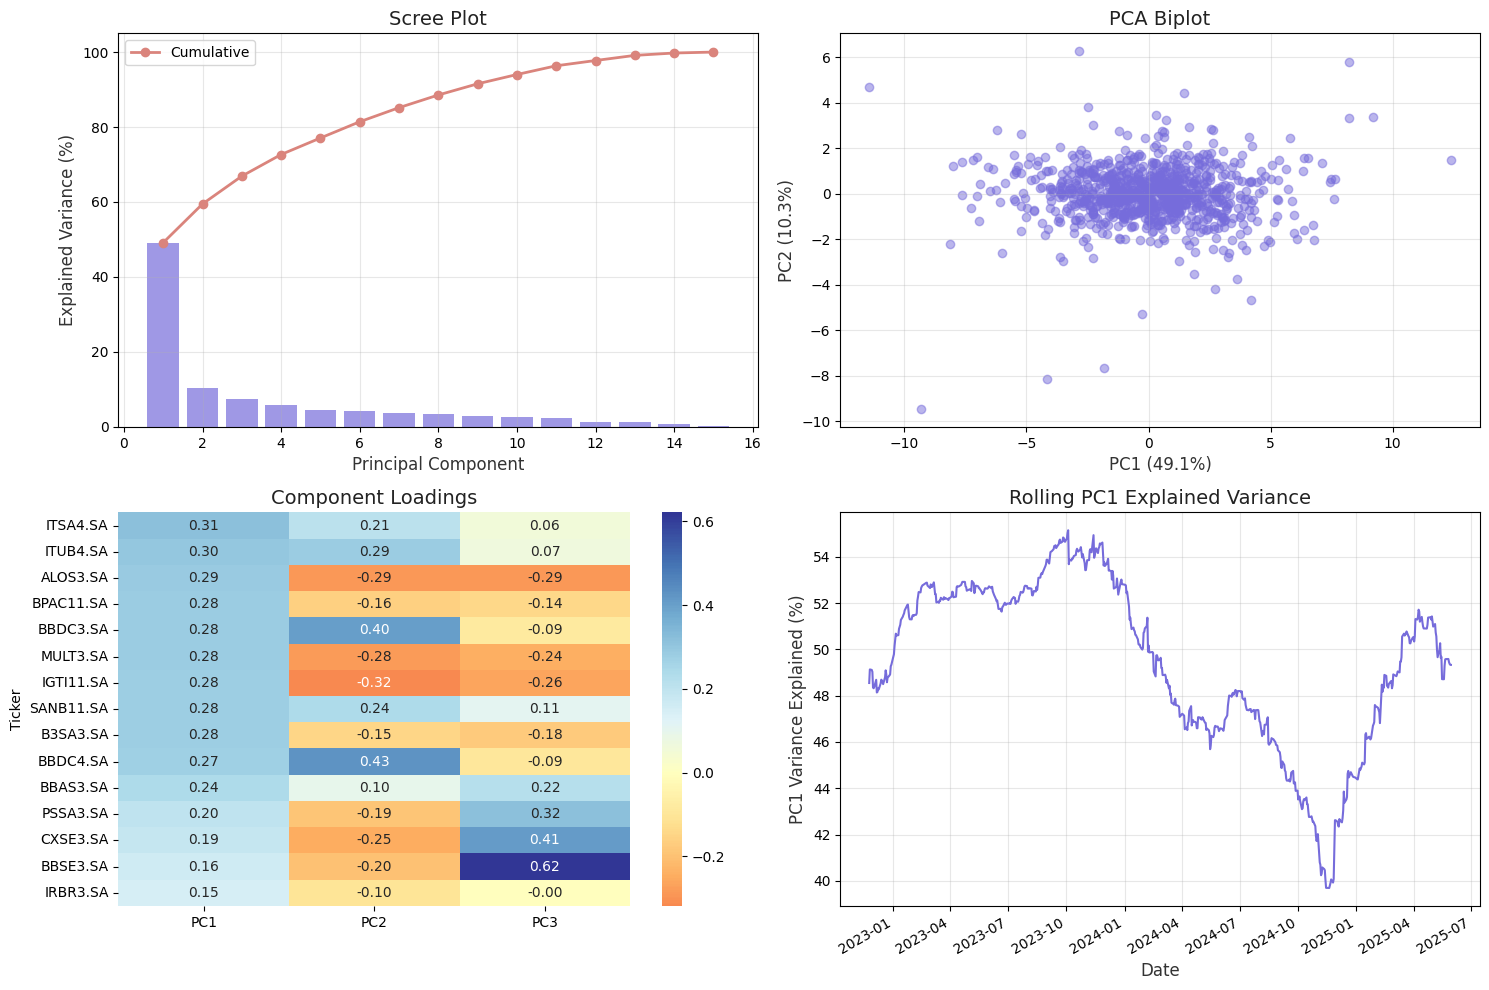


Risk Concentration Analysis:
     Explained Variance (%)  Cumulative Variance (%)
PC1                   49.14                    49.14
PC2                   10.32                    59.46
PC3                    7.43                    66.89
PC4                    5.77                    72.66
PC5                    4.41                    77.07

Top 5 Asset Contributions to PC1:
           Loading  Squared Loading  Contribution (%)
Ticker                                               
ITSA4.SA      0.31             0.10              9.90
ITUB4.SA      0.30             0.09              8.87
ALOS3.SA      0.29             0.08              8.30
BPAC11.SA     0.28             0.08              8.06
BBDC3.SA      0.28             0.08              7.99


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



# Parâmetro para janela de PCA rolante
window = 252  # ajuste conforme o período desejado

# 1. Padronizar os retornos
returns = data.pct_change().dropna()

scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# 2. Aplicar PCA
pca = PCA()
pca_results = pca.fit_transform(returns_scaled)

# 3. Visualizações
fig = plt.figure(figsize=(15, 10))

# === 1. Scree Plot ===
ax1 = plt.subplot(2, 2, 1)
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, len(var_exp)+1), var_exp, color='#766CDB', alpha=0.7)
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, color='#DA847C',
         marker='o', linewidth=2, label='Cumulative')
plt.xlabel('Principal Component', fontsize=12, color='#333333')
plt.ylabel('Explained Variance (%)', fontsize=12, color='#333333')
plt.title('Scree Plot', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)
plt.legend()

# === 2. Biplot ===
ax2 = plt.subplot(2, 2, 2)
loadings = pca.components_.T[:, :2]
scaled_loadings = loadings * np.sqrt(pca.explained_variance_[:2])

plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, color='#766CDB')
#for i, (x, y) in enumerate(scaled_loadings):
#    plt.arrow(0, 0, x*3, y*3, color='#DA847C', alpha=0.8)
#    plt.text(x*3.2, y*3.2, returns.columns[i], color='#333333')

plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=12, color='#333333')
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=12, color='#333333')
plt.title('PCA Biplot', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)

# === 3. Heatmap ===
ax3 = plt.subplot(2, 2, 3)
loadings_df = pd.DataFrame(
    pca.components_[:3].T,
    columns=['PC1', 'PC2', 'PC3'],
    index=returns.columns
)

# Opcional: mostrar só os top 15 ativos por contribuição ao PC1
top_assets = np.abs(pca.components_[0]).argsort()[-15:][::-1]
selected_assets = returns.columns[top_assets]
heatmap_df = loadings_df.loc[selected_assets]

sns.heatmap(heatmap_df, cmap='RdYlBu', center=0, annot=True, fmt='.2f')
plt.title('Component Loadings', fontsize=14, color='#222222')

# === 4. Rolling PC1 Explained Variance ===
rolling_pca = pd.DataFrame(index=returns.index[window-1:])
rolling_pca['PC1'] = np.nan

for i in range(len(rolling_pca)):
    temp_returns = returns_scaled[i:i+window]
    temp_pca = PCA()
    temp_pca.fit(temp_returns)
    rolling_pca.iloc[i, 0] = temp_pca.explained_variance_ratio_[0] * 100

rolling_pca.index = pd.to_datetime(rolling_pca.index)

ax4 = plt.subplot(2, 2, 4)
rolling_pca['PC1'].plot(color='#766CDB')
plt.xlabel('Date', fontsize=12, color='#333333')
plt.ylabel('PC1 Variance Explained (%)', fontsize=12, color='#333333')
plt.title('Rolling PC1 Explained Variance', fontsize=14, color='#222222')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === Análise de Concentração de Risco ===
risk_concentration = pd.DataFrame({
    'Explained Variance (%)': var_exp,
    'Cumulative Variance (%)': cum_var_exp
}, index=[f'PC{i+1}' for i in range(len(var_exp))])

print("\nRisk Concentration Analysis:")
print(risk_concentration.head().round(2))

# === Contribuição de cada ativo ao PC1 ===
pc1_contributions = pd.DataFrame({
    'Loading': pca.components_[0],
    'Squared Loading': pca.components_[0]**2,
    'Contribution (%)': (pca.components_[0]**2 / np.sum(pca.components_[0]**2)) * 100
}, index=returns.columns).sort_values('Contribution (%)', ascending=False)

print("\nTop 5 Asset Contributions to PC1:")
print(pc1_contributions.head().round(2))


In [ ]:
returns

Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2021-11-23,-0.005955,-0.009918,0.041810,0.024769,0.019326,-0.013749,0.009036,-0.051447,-0.029814,0.022500,0.009137,0.016765,-0.005361,0.012212,0.006176
2021-11-24,0.001383,0.017529,0.018525,0.017988,0.025766,0.005112,0.024876,-0.019209,-0.000302,0.026895,0.000000,0.026738,-0.001960,0.006255,0.020170
2021-11-25,0.025311,0.014766,0.051918,0.003865,0.008056,0.023116,0.060194,0.027650,0.051451,0.011905,0.009054,0.009115,0.016200,0.045293,0.016619
2021-11-26,-0.061939,-0.047696,-0.033008,-0.035204,-0.039962,-0.027112,-0.046703,-0.022422,-0.056266,-0.025882,-0.019940,-0.018925,-0.050725,-0.027613,-0.040304
2021-11-29,-0.003349,-0.023769,0.001626,-0.005701,-0.007345,-0.006038,0.034582,0.001147,0.016454,0.012077,-0.001017,-0.006576,-0.001526,-0.001747,-0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.005076,-0.004170,0.010238,0.005913,0.005115,-0.003675,0.006551,-0.008525,0.002313,0.032723,0.004488,0.002121,0.006950,0.001212,0.009021
2025-05-27,0.014692,0.003489,-0.004054,0.013960,0.020356,0.009747,0.027534,0.025132,0.025842,-0.004586,0.008937,0.007936,0.029141,0.010291,0.001324
2025-05-28,0.006787,-0.005563,-0.019943,0.017391,0.006858,-0.004435,0.005847,-0.014194,0.001799,0.025131,-0.010629,-0.008136,0.002235,0.010385,-0.011243


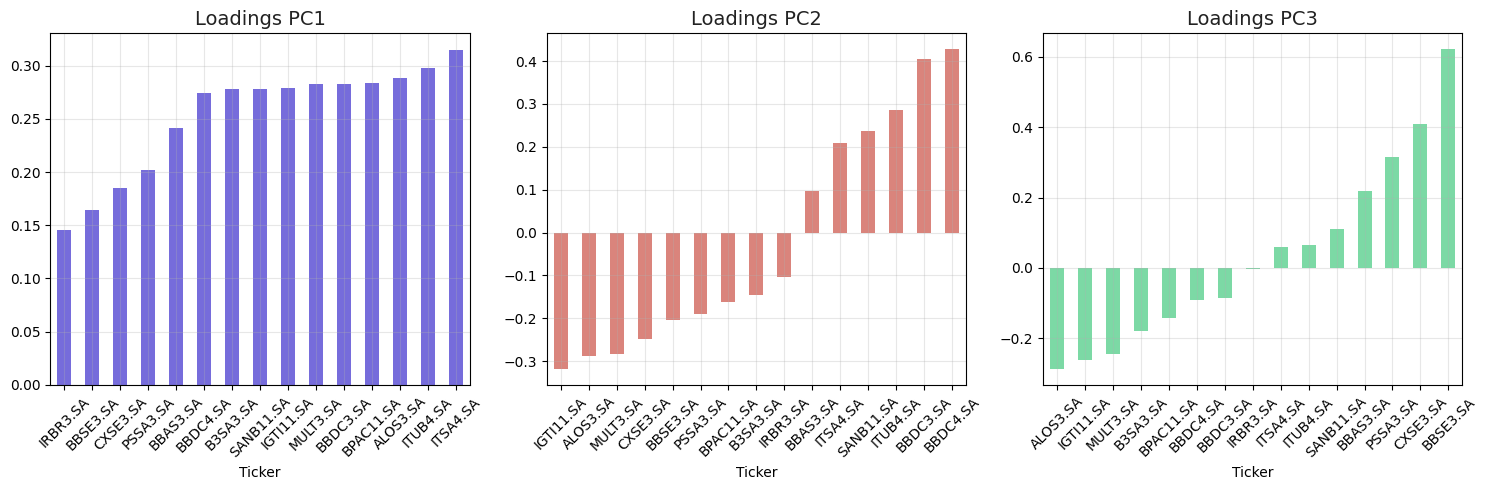

Contribuições para PC1:
Ticker
ITSA4.SA     9.90
ITUB4.SA     8.87
ALOS3.SA     8.30
BPAC11.SA    8.06
BBDC3.SA     7.99
Name: PC1, dtype: float64
Contribuições para PC2:
Ticker
BBDC4.SA     18.26
BBDC3.SA     16.36
IGTI11.SA    10.12
ALOS3.SA      8.33
ITUB4.SA      8.20
Name: PC2, dtype: float64
Contribuições para PC3:
Ticker
BBSE3.SA     38.65
CXSE3.SA     16.78
PSSA3.SA     10.03
ALOS3.SA      8.23
IGTI11.SA     6.79
Name: PC3, dtype: float64


In [ ]:
# Análise detalhada dos componentes principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Padronizar retornos
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Aplicar PCA
pca = PCA()
pca_results = pca.fit_transform(returns_scaled)

# Criar DataFrame com loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])],
    index=returns.columns
)

# Plot 1: Loadings dos primeiros 3 PCs
plt.figure(figsize=(15, 5))

# Subplot 1: Barplot dos loadings PC1
plt.subplot(1, 3, 1)
loadings['PC1'].sort_values().plot(kind='bar', color='#766CDB')
plt.title('Loadings PC1', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 2: Barplot dos loadings PC2
plt.subplot(1, 3, 2)
loadings['PC2'].sort_values().plot(kind='bar', color='#DA847C')
plt.title('Loadings PC2', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 3: Barplot dos loadings PC3
plt.subplot(1, 3, 3)
loadings['PC3'].sort_values().plot(kind='bar', color='#7CD9A5')
plt.title('Loadings PC3', fontsize=14, color='#222222')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calcular e mostrar contribuições para cada PC
for pc in range(3):
    print(f"\
Contribuições para PC{pc+1}:")
    contrib = pd.Series(loadings[f'PC{pc+1}']**2, index=loadings.index)
    contrib = (contrib / contrib.sum() * 100).sort_values(ascending=False)
    print(contrib.round(2).head())


# Gerando 1 gráfico(s) de Loadings dos PCs por Ativo (dividido em grupos)



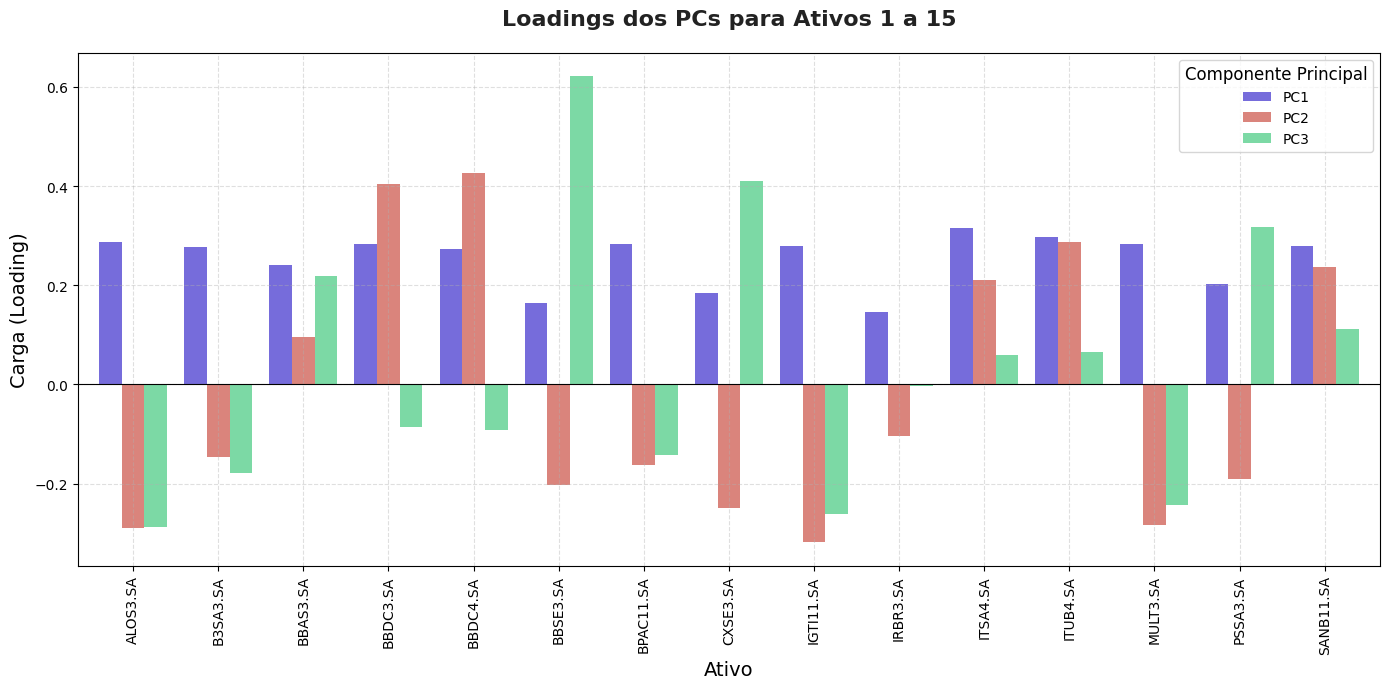


# Análise detalhada das contribuições dos componentes principais

Contribuições para PC1:
Ticker
ITSA4.SA     9.90
ITUB4.SA     8.87
ALOS3.SA     8.30
BPAC11.SA    8.06
BBDC3.SA     7.99
Name: PC1, dtype: float64
------------------------------
Contribuições para PC2:
Ticker
BBDC4.SA     18.26
BBDC3.SA     16.36
IGTI11.SA    10.12
ALOS3.SA      8.33
ITUB4.SA      8.20
Name: PC2, dtype: float64
------------------------------
Contribuições para PC3:
Ticker
BBSE3.SA     38.65
CXSE3.SA     16.78
PSSA3.SA     10.03
ALOS3.SA      8.23
IGTI11.SA     6.79
Name: PC3, dtype: float64
------------------------------


In [ ]:

# Padronizar retornos
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

# Aplicar PCA
pca = PCA()
pca_results = pca.fit_transform(returns_scaled)

num_pcs_to_consider = min(3, pca.components_.shape[0])
pc_columns = [f'PC{i+1}' for i in range(num_pcs_to_consider)]

loadings = pd.DataFrame(
    pca.components_[:num_pcs_to_consider].T,
    columns=pc_columns,
    index=returns.columns
)

# --- Plotagem dos loadings em estilo agrupado e dividido ---
assets_per_plot = 15  # Quantos ativos por subplot/gráfico
num_total_assets = len(loadings)
num_plots_needed = int(np.ceil(num_total_assets / assets_per_plot))

# Cores para PC1, PC2, PC3 (ajuste se tiver menos de 3 PCs)
colors_pc_map = {
    'PC1': '#766CDB', # Azul/Roxo
    'PC2': '#DA847C', # Vermelho/Salmão
    'PC3': '#7CD9A5'  # Verde
}
# Seleciona as cores para os PCs que realmente existem no DataFrame 'loadings'
plot_colors = [colors_pc_map[pc] for pc in loadings.columns if pc in colors_pc_map]


print(f"\n# Gerando {num_plots_needed} gráfico(s) de Loadings dos PCs por Ativo (dividido em grupos)\n")

for i in range(num_plots_needed):
    start_idx = i * assets_per_plot
    end_idx = min((i + 1) * assets_per_plot, num_total_assets)

    # Seleciona o chunk de ativos e os PCs desejados (PC1, PC2, PC3 se existirem)
    chunk_loadings_to_plot = loadings.iloc[start_idx:end_idx]

    if chunk_loadings_to_plot.empty:
        continue

    fig, ax = plt.subplots(figsize=(14, 7)) # Ajuste o figsize conforme necessário

    # Plotar barras agrupadas
    # O pandas plot vai usar as colunas de chunk_loadings_to_plot ('PC1', 'PC2', 'PC3')
    chunk_loadings_to_plot.plot(kind='bar', ax=ax, color=plot_colors, width=0.8)

    ax.set_title(f'Loadings dos PCs para Ativos {start_idx + 1} a {end_idx}', fontsize=16, color='#222222', pad=20, weight='bold')
    ax.set_xlabel('Ativo', fontsize=14)
    ax.set_ylabel('Carga (Loading)', fontsize=14)

    # Melhorar a visualização dos ticks do eixo x
    ax.tick_params(axis='y', labelsize=10)

    ax.grid(True, alpha=0.4, linestyle='--')
    ax.axhline(0, color='black', linewidth=0.8) # Linha no zero para referência

    # Legenda
    ax.legend(title='Componente Principal', fontsize=10, title_fontsize=12)

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()


# Calcular e mostrar contribuições para cada PC (código da sua pergunta original, adaptado)
# Este trecho já estava funcional, mas vou garantir que ele use 'num_pcs_to_consider'
print("\n# Análise detalhada das contribuições dos componentes principais\n")
for pc_idx in range(num_pcs_to_consider):
    pc_label = f'PC{pc_idx+1}'
    print(f"Contribuições para {pc_label}:")
    # Calcular contribuição como quadrado do loading
    contrib = pd.Series(loadings[pc_label]**2, index=loadings.index)
    # Normalizar para percentual da soma dos quadrados dos loadings para ESSE PC
    contrib_percent = (contrib / contrib.sum() * 100).sort_values(ascending=False)
    print(contrib_percent.round(2).head())
    print("-" * 30)

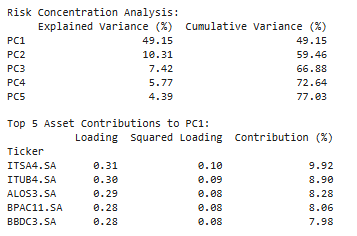

# Relatório de Análise de Concentração de Risco

Este relatório apresenta uma análise de concentração de risco baseada em componentes principais (PC). O objetivo é identificar os principais fatores de risco e as contribuições dos ativos para o primeiro componente principal (PC1).

## Variância Explicada

A tabela abaixo mostra a variância explicada por cada um dos cinco primeiros componentes principais, bem como a variância cumulativa.

| Componente Principal | Variância Explicada (%) | Variância Cumulativa (%) |
|----------------------|-------------------------|--------------------------|
| PC1                  | 49.15                   | 49.15                    |
| PC2                  | 10.31                   | 59.46                    |
| PC3                  | 7.42                    | 66.88                    |
| PC4                  | 5.77                    | 72.64                    |
| PC5                  | 4.39                    | 77.03                    |

O primeiro componente principal (PC1) explica a maior parte da variância dos dados, representando 49.15%. Os cinco primeiros componentes principais juntos explicam 77.03% da variância total. Isso sugere que um número relativamente pequeno de fatores principais pode capturar uma porção significativa da variabilidade dos ativos analisados.

## Top 5 Contribuições dos Ativos para o PC1

A tabela a seguir lista os cinco principais ativos que mais contribuem para o primeiro componente principal (PC1).

| Ticker    | Loading | Squared Loading | Contribuição (%) |
|-----------|---------|-----------------|------------------|
| ITSA4.SA  | 0.31    | 0.10            | 9.92             |
| ITUB4.SA  | 0.30    | 0.09            | 8.90             |
| ALOS3.SA  | 0.29    | 0.08            | 8.28             |
| BPAC11.SA | 0.28    | 0.08            | 8.06             |
| BBDC3.SA  | 0.28    | 0.08            | 7.98             |

Os ativos ITSA4.SA, ITUB4.SA, ALOS3.SA, BPAC11.SA e BBDC3.SA apresentam os maiores loadings no PC1 (variando de 0.28 a 0.31), indicando uma correlação positiva e relativamente forte com este fator de risco principal. A contribuição percentual de cada um desses ativos para o PC1 varia entre 7.98% e 9.92%. O ativo BBDC3.SA também apresenta uma contribuição significativa (7.98%).

## Conclusão

A análise de componentes principais revela que o primeiro componente principal (PC1) é responsável por uma parcela considerável da variância nos dados dos ativos (49.15%). Os cinco principais ativos identificados (ITSA4.SA, ITUB4.SA, ALOS3.SA, BPAC11.SA e BBDC3.SA) têm as maiores contribuições para este fator de risco principal.

## Interpretação Prática

### Diversificação:
- **PC1** mostra que **todos os ativos** são afetados pelo **risco de mercado**.
- **PC2** indica que manter um **mix de ações de crescimento e valor** pode ajudar na **diversificação**.
- **PC3** sugere **exposições específicas a setores** que podem ser **gerenciadas para otimizar a diversificação**.

### Gestão de Risco:
- Para **reduzir a exposição ao risco de mercado (PC1)**, considere **ativos com loadings menores**
- Para **equilibrar crescimento vs. valor (PC2)**, balanceie entre **tecnologia e defensivos**.
- Para **exposição setorial (PC3)**, monitore a **concentração em financeiras e outros setores específicos**.

### Construção de Portfólio:
- Para um **portfólio mais defensivo**: **aumente o peso** em ativos com **loadings menores em PC1**.
- Para um **portfólio mais balanceado**: **misture ativos** com **loadings opostos em PC2**.
- Para **exposição setorial específica**: **use os loadings de PC3** como guia.

Essa análise ajuda a **entender como os diferentes ativos se comportam** em relação aos **principais fatores de risco do mercado**, permitindo uma **melhor gestão do portfólio e diversificação**.ção.

In [ ]:
# 5. Projeção dos ativos nos dois primeiros componentes
# Transpor a matriz para que cada ativo seja uma variável
retornos_T = retornos_diarios.T
retornos_T_pad = scaler.fit_transform(retornos_T)

# PCA sobre ativos (linhas = ativos)
pca_ativos = PCA(n_components=2)
coords = pca_ativos.fit_transform(retornos_T_pad)

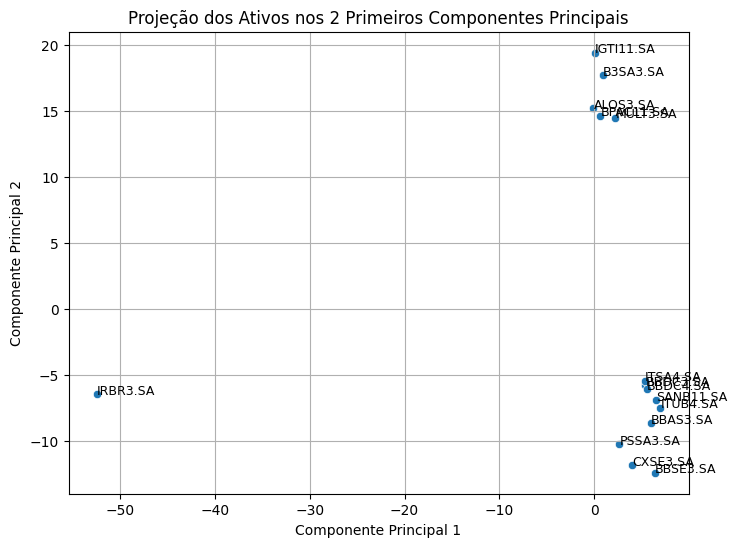

In [ ]:
# Plotar projeção
plt.figure(figsize=(8, 6))
sns.scatterplot(x=coords[:, 0], y=coords[:, 1])
for i, nome in enumerate(retornos_T.index):
    plt.text(coords[i, 0], coords[i, 1], nome, fontsize=9)
plt.title("Projeção dos Ativos nos 2 Primeiros Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.show()

(ideia de fazer análise de agrupamento aqui)

Aqui o gráfico fica meio sujo, vou pegar somente os 5 maiores.


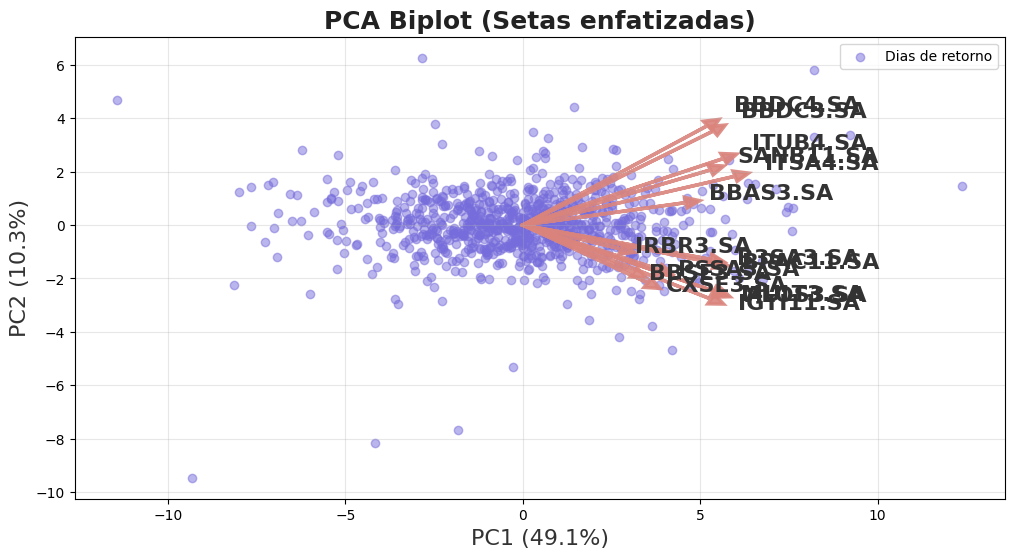

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))

# Calcular os loadings escalados
loadings = pca.components_.T[:, :2]
scaled_loadings = loadings * np.sqrt(pca.explained_variance_[:2])

# Criar o scatter plot dos resultados PCA
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, color='#766CDB', label="Dias de retorno")

# Ajuste para enfatizar mais as setas e os textos
seta_escala = 7  # Aumentando ainda mais o tamanho das setas
tamanho_fonte = 16  # Maior visibilidade para os nomes das ações

for i, (x, y) in enumerate(scaled_loadings):
    plt.arrow(0, 0, x*seta_escala, y*seta_escala, color='#DA847C', alpha=0.9, linewidth=2.5, head_width=0.4, head_length=0.4)
    plt.text(x*(seta_escala + 1), y*(seta_escala + 1), returns.columns[i], color='#333333', fontsize=tamanho_fonte, fontweight='bold')

# Configurar labels e título
plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=16, color='#333333')
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=16, color='#333333')
plt.title('PCA Biplot (Setas enfatizadas)', fontsize=18, color='#222222', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Exibir o gráfico
plt.show()

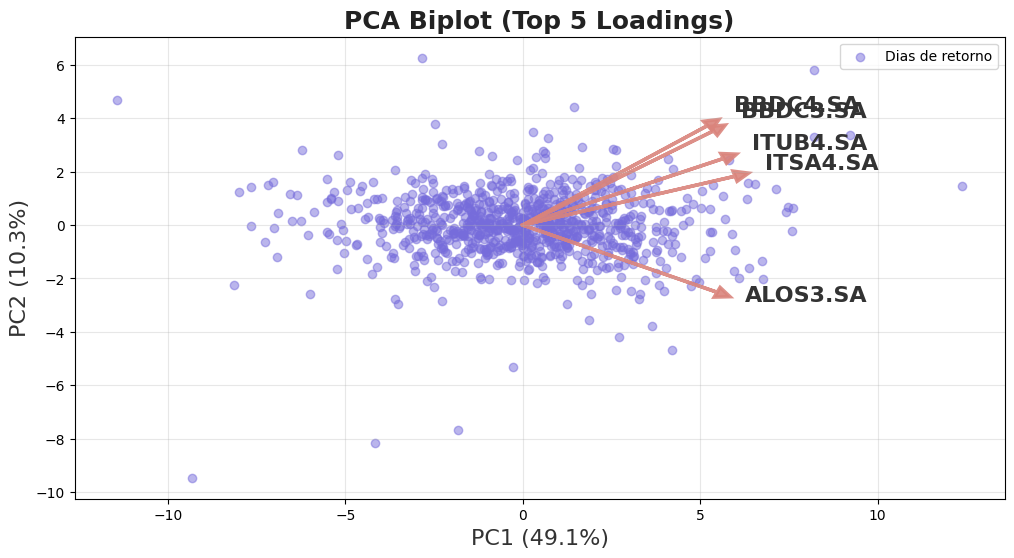

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Importe pandas

plt.figure(figsize=(12, 6))


loadings = pca.components_.T[:, :2]
scaled_loadings = loadings * np.sqrt(pca.explained_variance_[:2])


plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5, color='#766CDB', label="Dias de retorno")

# Encontrar os 5 maiores loadings (em valor absoluto)
loadings_magnitude = np.linalg.norm(scaled_loadings, axis=1)
top_5_indices = np.argsort(loadings_magnitude)[-5:]  # Índices dos 5 maiores

# Ajuste para enfatizar mais as setas e os textos
seta_escala = 7  # Aumentando ainda mais o tamanho das setas
tamanho_fonte = 16  # Maior visibilidade para os nomes das ações

for i in top_5_indices:
    x, y = scaled_loadings[i]
    plt.arrow(0, 0, x * seta_escala, y * seta_escala, color='#DA847C', alpha=0.9, linewidth=2.5, head_width=0.4, head_length=0.4)
    plt.text(x * (seta_escala + 1), y * (seta_escala + 1), returns.columns[i], color='#333333', fontsize=tamanho_fonte, fontweight='bold')

# Configurar labels e título
plt.xlabel(f'PC1 ({var_exp[0]:.1f}%)', fontsize=16, color='#333333')
plt.ylabel(f'PC2 ({var_exp[1]:.1f}%)', fontsize=16, color='#333333')
plt.title('PCA Biplot (Top 5 Loadings)', fontsize=18, color='#222222', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

# Exibir o gráfico
plt.show()

### Interpretação das Setas no Biplot

As **setas do biplot** representam a **direção** e a **intensidade** da influência de cada **ativo** nos **dois primeiros componentes principais** (**PC1 e PC2**).

- O **comprimento da seta** indica **quanto o ativo contribui** para a **variância explicada** por esses componentes.
- A **direção** da seta mostra se a influência do ativo está **mais alinhada ao PC1**, ao **PC2**, ou a **uma combinação dos dois**.

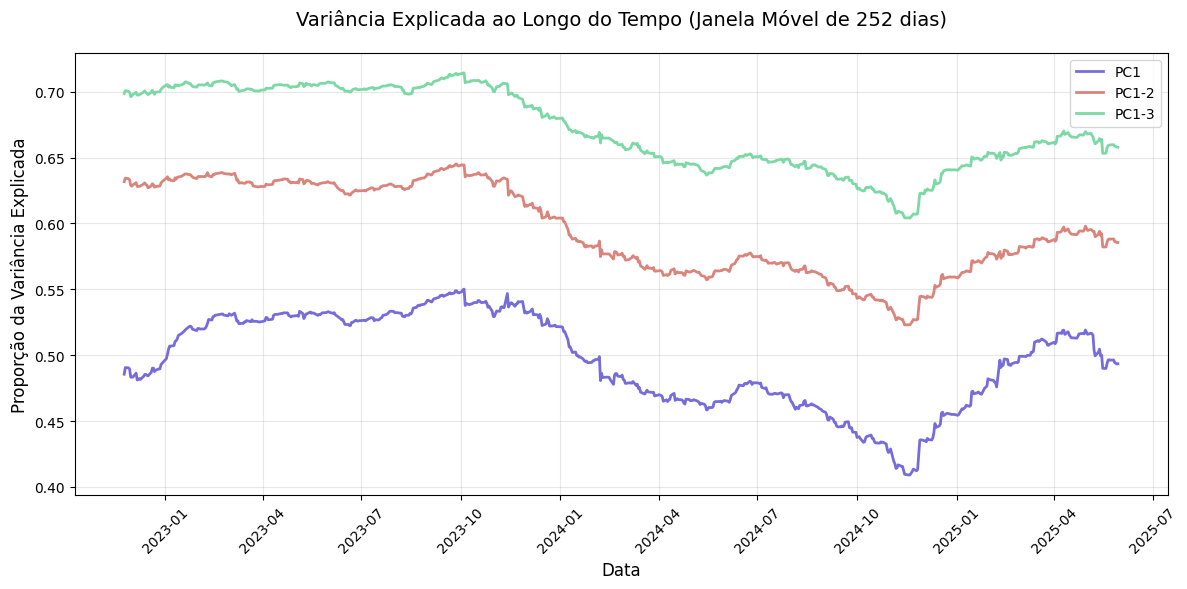

Estatísticas da variância explicada ao longo do tempo:
           PC1    PC1-2    PC1-3
count  627.000  627.000  627.000
mean     0.496    0.595    0.671
std      0.035    0.034    0.030
min      0.409    0.523    0.604
25%      0.469    0.565    0.647
50%      0.497    0.588    0.666
75%      0.528    0.630    0.703
max      0.550    0.645    0.714


In [ ]:
# Criar gráfico de Rolling Variance Explained
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Definir janela móvel
window = 252  # 1 ano de trading
variance_explained = pd.DataFrame(index=returns.index[window-1:])

# Calcular PCA rolling
for i in range(window, len(returns) + 1):
    # Selecionar dados da janela
    window_data = returns.iloc[i-window:i]

    # Padronizar dados
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(window_data)

    # Aplicar PCA
    pca = PCA()
    pca.fit(scaled_data)

    # Armazenar variância explicada pelos primeiros componentes
    variance_explained.loc[returns.index[i-1], 'PC1'] = pca.explained_variance_ratio_[0]
    variance_explained.loc[returns.index[i-1], 'PC1-2'] = sum(pca.explained_variance_ratio_[:2])
    variance_explained.loc[returns.index[i-1], 'PC1-3'] = sum(pca.explained_variance_ratio_[:3])

# Plotar resultados
plt.figure(figsize=(12, 6))
plt.plot(variance_explained.index, variance_explained['PC1'],
         label='PC1', linewidth=2, color='#766CDB')
plt.plot(variance_explained.index, variance_explained['PC1-2'],
         label='PC1-2', linewidth=2, color='#DA847C')
plt.plot(variance_explained.index, variance_explained['PC1-3'],
         label='PC1-3', linewidth=2, color='#7CD9A5')

plt.title('Variância Explicada ao Longo do Tempo (Janela Móvel de 252 dias)',
          fontsize=14, pad=20)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Proporção da Variância Explicada', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Mostrar estatísticas descritivas
print("\
Estatísticas da variância explicada ao longo do tempo:")
print(variance_explained.describe().round(3))

## Gráfico de Variância Explicada em Janela Móvel

O **gráfico de Variância Explicada** mostra **quanto da variância total** nos retornos do portfólio é capturado pelo **primeiro componente principal (PC1)**, pela **soma dos dois primeiros (PC1-2)** e pela **soma dos três primeiros (PC1-3)** ao longo do tempo, utilizando uma **janela móvel de 252 dias de negociação** (aproximadamente **um ano**).

Essa visualização permite entender **como a importância dos principais fatores de risco muda** conforme as **condições de mercado evoluem**.

- Quando a linha de **PC1 sobe**, significa que **um único fator comum** (como o **risco de mercado geral**) está explicando uma **parcela maior dos movimentos** do portfólio.
- Quando as linhas estão **mais baixas**, o risco está **mais diversificado** entre múltiplos fatores.

### Pontos-chave:

- **Em média**, o **PC1 explica cerca de 42% da variância**, enquanto os **três primeiros componentes juntos explicam cerca de 61%**.
- Há períodos em que **PC1 explica tão pouco quanto 21% ou até 68% da variância**, indicando que **a estrutura do mercado e a concentração de risco do portfólio podem mudar significativamente ao longo do tempo**.
- **Valores elevados de PC1 ou PC1-2** sugerem que o **portfólio está mais exposto a riscos sistemáticos (comuns)**, enquanto **valores mais baixos indicam maior diversificação** entre diferentes fontes de risco.
- Essa análise ajuda a **monitorar quão concentrado ou diversificado** está o **risco do portfólio** e pode **alertar para períodos em que um único fator domina a performance**, possivelmente sinalizando **aumento da vulnerabilidade a choques de mercado**.

# Benefícios do PCA para o Portfólio

- **Redução do risco não sistemático** ao evitar concentração em fatores específicos.
- **Melhoria da diversificação** ao combinar ativos de diferentes grupos.
- **Maior resiliência do portfólio** frente a choques em fatores de risco individuais.

Ao utilizar a **PCA** para agrupar ativos e orientar a alocação, é possível construir um **portfólio mais robusto, diversificado e alinhado** com os objetivos de risco e retorno do investidor.

# Resumo prático

- Use a **PCA** para identificar os principais fatores de risco.
- **Diversifique** escolhendo ativos com exposições distintas aos componentes principais.
- **Reduza a dimensionalidade** para facilitar a gestão e o monitoramento do portfólio.
- **Ajuste a alocação de ativos** com base nos insights dos componentes principais para otimizar o equilíbrio entre **risco e retorno**.

In [ ]:
loadings

array([[ 0.2881198 , -0.28867867],
       [ 0.27769482, -0.14691271],
       [ 0.24167576,  0.09643787],
       [ 0.28257981,  0.40441969],
       [ 0.27386326,  0.42725927],
       [ 0.1642186 , -0.20310517],
       [ 0.28389835, -0.16270402],
       [ 0.18528103, -0.24806768],
       [ 0.27907414, -0.31809065],
       [ 0.14564762, -0.10290359],
       [ 0.31461031,  0.20979857],
       [ 0.29776539,  0.28630768],
       [ 0.28247124, -0.28340229],
       [ 0.2019767 , -0.1903845 ],
       [ 0.27819743,  0.2368373 ]])

In [ ]:
ibov = yf.download('^BVSP', start="2015-01-01", end="2025-06-01")['Close']
ibov

[*********************100%***********************]  1 of 1 completed


Ticker,^BVSP
Date,
2015-01-02,48512.0
2015-01-05,47517.0
2015-01-06,48001.0
2015-01-07,49463.0
2015-01-08,49943.0
...,...
2025-05-26,138136.0
2025-05-27,139541.0
2025-05-28,138888.0


In [ ]:
retornos = ibov.pct_change()

# Remover a primeira linha que terá NaNs devido ao cálculo de retornos
retornos = retornos.dropna()



In [ ]:
returns

Ticker,ALOS3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,CXSE3.SA,IGTI11.SA,IRBR3.SA,ITSA4.SA,ITUB4.SA,MULT3.SA,PSSA3.SA,SANB11.SA
Date,,,,,,,,,,,,,,,
2021-11-23,-0.005955,-0.009918,0.041810,0.024769,0.019326,-0.013749,0.009036,-0.051447,-0.029814,0.022500,0.009137,0.016765,-0.005361,0.012212,0.006176
2021-11-24,0.001383,0.017529,0.018525,0.017988,0.025766,0.005112,0.024876,-0.019209,-0.000302,0.026895,0.000000,0.026738,-0.001960,0.006255,0.020170
2021-11-25,0.025311,0.014766,0.051918,0.003865,0.008056,0.023116,0.060194,0.027650,0.051451,0.011905,0.009054,0.009115,0.016200,0.045293,0.016619
2021-11-26,-0.061939,-0.047696,-0.033008,-0.035204,-0.039962,-0.027112,-0.046703,-0.022422,-0.056266,-0.025882,-0.019940,-0.018925,-0.050725,-0.027613,-0.040304
2021-11-29,-0.003349,-0.023769,0.001626,-0.005701,-0.007345,-0.006038,0.034582,0.001147,0.016454,0.012077,-0.001017,-0.006576,-0.001526,-0.001747,-0.002937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.005076,-0.004170,0.010238,0.005913,0.005115,-0.003675,0.006551,-0.008525,0.002313,0.032723,0.004488,0.002121,0.006950,0.001212,0.009021
2025-05-27,0.014692,0.003489,-0.004054,0.013960,0.020356,0.009747,0.027534,0.025132,0.025842,-0.004586,0.008937,0.007936,0.029141,0.010291,0.001324
2025-05-28,0.006787,-0.005563,-0.019943,0.017391,0.006858,-0.004435,0.005847,-0.014194,0.001799,0.025131,-0.010629,-0.008136,0.002235,0.010385,-0.011243


In [ ]:
common_index = returns.index.intersection(retornos.index)
retornos_ativos_df = returns.loc[common_index]
retornos_ibov_series = retornos.loc[common_index]


In [ ]:
retornos_ibov_series

Ticker,^BVSP
Date,
2021-11-23,0.015090
2021-11-24,0.008209
2021-11-25,0.012410
2021-11-26,-0.033900
2021-11-29,0.005772
...,...
2025-05-26,0.002264
2025-05-27,0.010171
2025-05-28,-0.004680



Component Loadings (Pesos dos Ativos em cada PC):
Ticker  ALOS3.SA  B3SA3.SA  BBAS3.SA  BBDC3.SA  BBDC4.SA  BBSE3.SA  BPAC11.SA  \
PC1     0.288120  0.277695  0.241676  0.282580  0.273863  0.164219   0.283898   
PC2    -0.288679 -0.146913  0.096438  0.404420  0.427259 -0.203105  -0.162704   
PC3    -0.286915 -0.177906  0.219588 -0.086625 -0.092262  0.621730  -0.141476   

Ticker  CXSE3.SA  IGTI11.SA  IRBR3.SA  ITSA4.SA  ITUB4.SA  MULT3.SA  PSSA3.SA  \
PC1     0.185281   0.279074  0.145648  0.314610  0.297765  0.282471  0.201977   
PC2    -0.248068  -0.318091 -0.102904  0.209799  0.286308 -0.283402 -0.190385   
PC3     0.409626  -0.260655 -0.002844  0.058480  0.065643 -0.243226  0.316684   

Ticker  SANB11.SA  
PC1      0.278197  
PC2      0.236837  
PC3      0.110958  

Primeiras 5 linhas dos Scores dos Componentes Principais (Séries Temporais):
                 PC1       PC2       PC3
Date                                    
2021-11-23  0.715264  3.257481 -0.734752
2021-11-24  2.2277

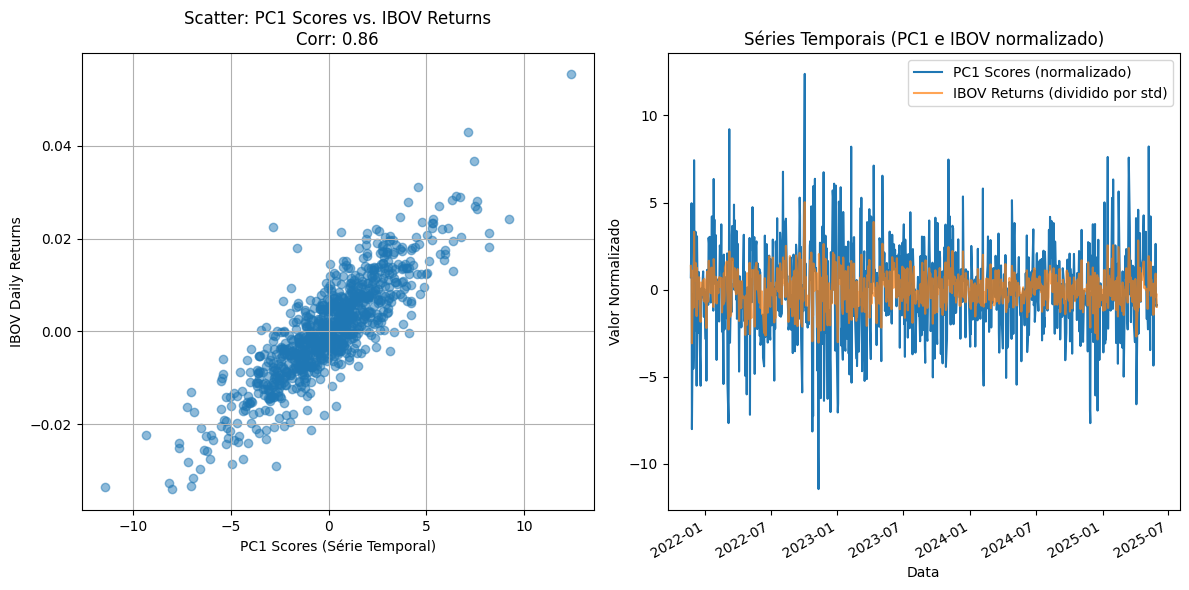

In [ ]:

scaler = StandardScaler()
scaled_asset_returns = scaler.fit_transform(retornos_ativos_df.values)

n_ativos = retornos_ativos_df.shape[1]
n_components = min(3, n_ativos)

pca = PCA(n_components=n_components)
pca.fit(scaled_asset_returns) # Treina o PCA com os retornos escalonados dos ativos


loadings_df = pd.DataFrame(pca.components_,
                           columns=retornos_ativos_df.columns, # Nomes dos seus ativos
                           index=[f'PC{i+1}' for i in range(n_components)])
print("\nComponent Loadings (Pesos dos Ativos em cada PC):")
print(loadings_df)


pc_scores_array = pca.transform(scaled_asset_returns)
pc_scores_df = pd.DataFrame(data=pc_scores_array,
                            columns=[f'PC{i+1}' for i in range(n_components)],
                            index=retornos_ativos_df.index) # Usa o índice de datas dos retornos

print("\nPrimeiras 5 linhas dos Scores dos Componentes Principais (Séries Temporais):")
print(pc_scores_df.head())


pc1_series = pc_scores_df['PC1'] # Série temporal do primeiro componente principal


correlation = pc1_series.corr(retornos_ibov_series['^BVSP'])

print(f"\nCorrelação entre os scores do PC1 e os retornos diários do IBOVESPA: {correlation:.4f}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pc1_series, retornos_ibov_series['^BVSP'], alpha=0.5)
plt.title(f'Scatter: PC1 Scores vs. IBOV Returns\nCorr: {correlation:.2f}')
plt.xlabel('PC1 Scores (Série Temporal)')
plt.ylabel('IBOV Daily Returns')
plt.grid(True)

plt.subplot(1, 2, 2)
pc1_series.plot(label='PC1 Scores (normalizado)', legend=True)


(retornos_ibov_series['^BVSP'] / retornos_ibov_series['^BVSP'].std()).plot(label='IBOV Returns (dividido por std)', legend=True, alpha=0.7)
plt.title('Séries Temporais (PC1 e IBOV normalizado)')
plt.xlabel('Data')
plt.ylabel('Valor Normalizado')

plt.tight_layout()
plt.show()